In [37]:
import pandas as pd 
data = pd.read_csv("D:/Berkeley/Spring/stat-214-gsi/lab1/data/TBI PUD 10-08-2013.csv")

In [38]:
# Set plotting font sizes and properties
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
TINY_SIZE = 12
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
MARKER_SIZE = 6
LINE_SIZE = 4

plt.rc("font", size=SMALL_SIZE)  
plt.rc("axes", titlesize=BIGGER_SIZE)  
plt.rc("axes", labelsize=MEDIUM_SIZE) 
plt.rc("xtick", labelsize=SMALL_SIZE)  
plt.rc("ytick", labelsize=SMALL_SIZE)  
plt.rc("legend", fontsize=TINY_SIZE)  
plt.rc("figure", titlesize=BIGGER_SIZE) 
plt.rc("lines", markersize=MARKER_SIZE) 
plt.rc("lines", linewidth=LINE_SIZE)  

mpl.rcParams["figure.dpi"] = 180

# Height and width per row and column of subplots
FIG_HEIGHT = 20
FIG_WIDTH = 18

fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("colorblind")

%matplotlib inline

In [39]:
missing_values = data.isnull().sum()
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column Name', 'Missing Values']
csv_filename = "missing_values.csv"
missing_values_df.to_csv(csv_filename, index=False)

In [40]:
import numpy as np
def infer_missing_outcome(row):
    outcome = 'Unknown'
    not_missing = [data for data in row if data != np.nan]
    if len(not_missing) == len(row) and not_missing.count(not_missing[0]) == len(not_missing):
        outcome = not_missing[0]
    return outcome

outcome_vars = ['HospHeadPosCT', 'Intub24Head', 'Neurosurgery', 'DeathTBI']
data.loc[data['PosIntFinal'].isna(), 'PosIntFinal'] = data[data['PosIntFinal'].isna()][outcome_vars].apply(infer_missing_outcome, axis=1)
print(data.shape)
data = data.loc[data['PosIntFinal'].isna()==False]
print(data.shape)

(43399, 125)
(43399, 125)


C:\Users\admin\AppData\Local\Temp\ipykernel_11588\360103966.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Unknown' 'Unknown' 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 'Unknown' 0.0
 0.0 0.0 0.0 0.0 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data['PosIntFinal'].isna(), 'PosIntFinal'] = data[data['PosIntFinal'].isna()][outcome_vars].apply(infer_missing_outcome, axis=1)


In [41]:
data['PosIntFinal'].value_counts()

PosIntFinal
0.0        42633
1.0          763
Unknown        3
Name: count, dtype: int64

In [42]:
def rename_tbi(df):
    empl_type = {
        1: 'Nurse Practitioner',
        2: 'Physician Assistant',
        3: 'Resident',
        4: 'Fellow',
        5: 'Faculty',
        np.nan: 'Unknown'
    }
    df['EmplType'] = df['EmplType'].map(empl_type)

    cert_type = {
        1: 'Emergency Medicine',
        2: 'Pediatrics',
        3: 'Pediatrics Emergency Medicine',
        4: 'Emergency Medicine and Pediatrics',
        90: 'Other',
        np.nan: 'Unknown'
    }
    df['Certification'] = df['Certification'].map(cert_type)

    inj_mech = {
        1: 'MVC',
        2: 'PedesMV',
        3: 'BikeMV',
        4: 'BikeCol',
        5: 'OtherWheelCrash',
        6: 'FallToGround',
        7: 'RanIntoStatObj',
        8: 'FallElev',  
        9: 'FallStair', 
        10: 'Sports',
        11: 'Assault',
        12: 'ObjStruckHead',
        90: 'Other',
        np.nan: 'Unknown'
    }
    df['InjuryMech'] = df['InjuryMech'].map(inj_mech)

    inj_impact_sev = {
        1: 'Low',
        2: 'Moderate',
        3: 'High',
        np.nan: 'Unknown'
    }
    df['High_impact_InjSev'] = df['High_impact_InjSev'].map(inj_impact_sev)

    # mapping binary variables to just yes and no
    binary0 = {
        0: 'No',
        1: 'Yes',
        np.nan: 'Unknown',
    }
    bool_cols0 = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1]).all()]
    for bool_col in bool_cols0:
        df[bool_col] = df[bool_col].map(binary0)

    # mapping binary variables to yes, no or unknown (for not applicable)
    binary1 = {
        0: 'No',
        1: 'Yes',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }    
    bool_cols1 = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1, 92]).all()]
    for bool_col in bool_cols1:
        df[bool_col] = df[bool_col].map(binary1)

    verb = {
        0: 'No',
        1: 'Yes',
        91: 'Pre/Non-verbal',
        np.nan: 'Unknown'
    }  
    bool_cols2 = [col for col in df if np.isin(df[col].dropna().unique(), [0, 1, 91]).all()]
    for bool_col in bool_cols2:
        df[bool_col] = df[bool_col].map(verb)

    loc_separate = {
        0: 'No',
        1: 'Yes',
        2: 'Suspected',
        np.nan: 'Unknown'
    }
    df['LOCSeparate'] = df['LOCSeparate'].map(loc_separate)

    loc_len = {
        1: '<5 sec',
        2: '5 sec - 1 min',
        3: '1-5 min',
        4: '>5 min',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['LocLen'] = df['LocLen'].map(loc_len)
    
    seiz_occur = {
        1: 'Immediately on contact',
        2: 'Within 30 minutes of injury',
        3: '>30 minutes after injury',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['SeizOccur'] = df['SeizOccur'].map(seiz_occur)
    
    seiz_len = {
        1: '<1 min',
        2: '1-5 min',
        3: '5-15 min',
        4: '>15 min',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['SeizLen'] = df['SeizLen'].map(seiz_len)
    
    ha_severity = {
        1: 'Mild',
        2: 'Moderate',
        3: 'Severe',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['HASeverity'] = df['HASeverity'].map(ha_severity)
    
    ha_start = {
        1: 'Before head injury',
        2: 'Within 1 hr of event',
        3: '1-4 hrs after event',
        4: '>4 hrs after event',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['HAStart'] = df['HAStart'].map(ha_start)
    
    vomit_nbr = {
        1: 'Once',
        2: 'Twice',
        3: '>2 times',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['VomitNbr'] = df['VomitNbr'].map(vomit_nbr)
    
    vomit_start = {
        1: 'Before head injury',
        2: 'Within 1 hr of event',
        3: '1-4 hrs after event',
        4: '>4 hrs after event',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['VomitStart'] = df['VomitStart'].map(vomit_start)
    
    vomit_last = {
        1: '<1 hr before ED',
        2: '1-4 hrs before ED',
        3: '>4 hrs before ED',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['VomitLast'] = df['VomitLast'].map(vomit_last)
    
    gcs_eye = {
        1: 'None',
        2: 'Pain',
        3: 'Verbal',
        4: 'Spontaneous',
        np.nan: 'Unknown'
    }
    df['GCSEye'] = df['GCSEye'].map(gcs_eye)
    
    gcs_verbal = {
        1: 'None',
        2: 'Incomprehensible sounds/moans',
        3: 'Inappropriate words/cries',
        4: 'Confused/cries',
        5: 'Oriented/coos',
        np.nan: 'Unknown'
    }
    df['GCSVerbal'] = df['GCSVerbal'].map(gcs_verbal)
    
    gcs_motor = {
        1: 'None',
        2: 'Abnormal extension posturing',
        3: 'Abnormal flexing posturing',
        4: 'Pain withdraws',
        5: 'Localizes pain',
        6: 'Follow commands',
    }
    df['GCSMotor'] = df['GCSMotor'].map(gcs_motor)
    
    sfxpalp = {
        0: 'No',
        1: 'Yes',
        2: 'Unclear',
    }
    df['SFxPalp'] = df['SFxPalp'].map(sfxpalp)
        
    # map hermaloc to values
    hema_loc = {
        1: 'Frontal',
        2: 'Occipital',
        3: 'Parietal/Temporal',
        92: 'Not applicable',
    }
    df['HemaLoc'] = df['HemaLoc'].map(hema_loc)
    
    # mapping hermasize to values
    hema_size = {
        1: 'Small',
        2: 'Medium',
        3: 'Large',
        92: 'Not applicable',
        np.nan: 'Unknown'
    }
    df['HemaSize'] = df['HemaSize'].map(hema_size)
    
    # mapping gender to value
    gender = {
        1: 'Male',
        2: 'Female',
        np.nan: 'Unknown'
    }
    df['Gender'] = df['Gender'].map(gender)
    
    
    # mapping ethnicity to names
    eth = {
        1: 'Hispanic',
        2: 'Non-Hispanic',
        np.nan: 'Unknown'
    }
    df['Ethnicity'] = df['Ethnicity'].map(eth)
    
    # mapping race to names
    races = {
        1: 'White',
        2: 'Black',
        3: 'Asian',
        4: 'American Indian',
        5: 'Pacific Islander',
        90: 'Other',
        np.nan: 'Unknown'
    }
    df['Race'] = df['Race'].map(races)
    
    # mapping ed disposition to names
    ed_disposition = {
        1: 'Home',
        2: 'OR',
        3: 'Admit - general patient',
        4: 'Short-stay\Observation',
        5: 'ICU',
        6: 'Transferred Hospital',
        7: 'AMA',
        8: 'Death in ED',
        90: 'Other',
        np.nan: 'Unknown'
    }
    df['EDDisposition'] = df['EDDisposition'].map(ed_disposition)

    return df

In [43]:
df = rename_tbi(data)

C:\Users\admin\AppData\Local\Temp\ipykernel_11588\4188499173.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_fall_counts = df.groupby("AgeGroup")[injury_mech_col].apply(lambda x: (x == fall_category).mean()).reset_index()


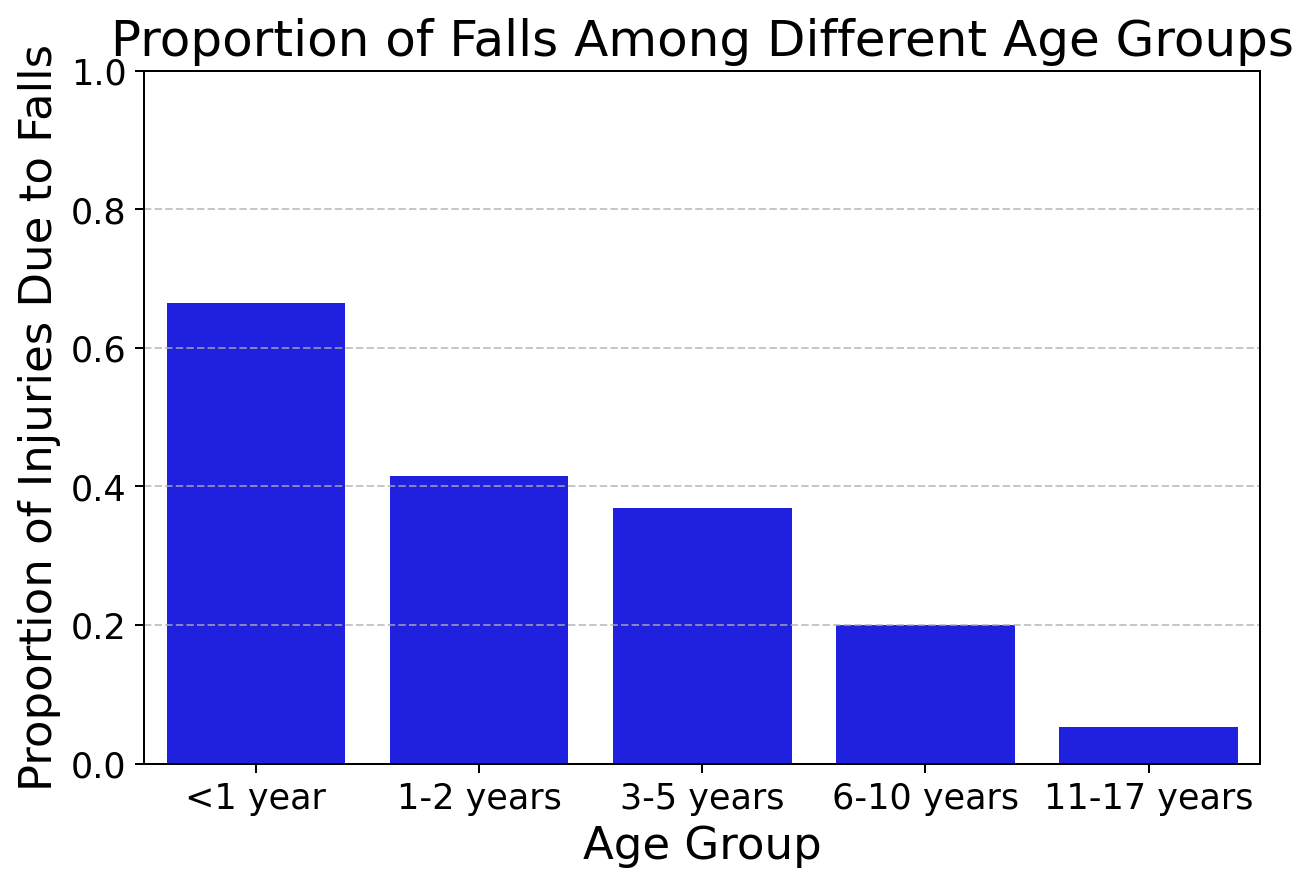

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fall_risk_by_age(df, age_col="AgeinYears", injury_mech_col="InjuryMech", fall_category="FallElev"):
    """
    Plots the proportion of injury mechanisms due to falls across different age groups.
    
    Parameters:
    df (DataFrame): The dataset containing age and injury mechanism columns.
    age_col (str): The column name representing patient age.
    injury_mech_col (str): The column name representing the injury mechanism.
    fall_category (str): The category indicating a fall-related injury.
    """
    # Define age bins (infants, toddlers, young children, older children, teens)
    bins = [0, 1, 2, 5, 10, 18]
    labels = ["<1 year", "1-2 years", "3-5 years", "6-10 years", "11-17 years"]

    # Create an age group column
    df["AgeGroup"] = pd.cut(df[age_col], bins=bins, labels=labels, right=False)

    # Calculate the proportion of falls in each age group
    age_fall_counts = df.groupby("AgeGroup")[injury_mech_col].apply(lambda x: (x == fall_category).mean()).reset_index()

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(data=age_fall_counts, x="AgeGroup", y=injury_mech_col, color="blue")

    plt.title("Proportion of Falls Among Different Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Proportion of Injuries Due to Falls")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.savefig("falls among age group.png")


# Call the function (assuming df is the dataset and "FallElev" represents falls)
df1 = df.copy()
plot_fall_risk_by_age(df1, age_col="AgeinYears", injury_mech_col="InjuryMech", fall_category="FallElev")


In [45]:
df.head()

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,...,Finding20,Finding21,Finding22,Finding23,DeathTBI,HospHead,HospHeadPosCT,Intub24Head,Neurosurgery,PosIntFinal
0,1,Resident,Pediatrics Emergency Medicine,Assault,Moderate,No,No,Not applicable,No,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,No,No,No,No,No,0.0
1,2,Faculty,Pediatrics Emergency Medicine,FallElev,Moderate,No,No,Not applicable,No,Not applicable,...,No,No,No,No,No,No,No,No,No,0.0
2,3,Faculty,Pediatrics Emergency Medicine,OtherWheelCrash,Moderate,Unknown,Unknown,Not applicable,Unknown,Not applicable,...,No,No,No,No,No,Yes,No,No,No,0.0
3,4,Faculty,Pediatrics Emergency Medicine,FallToGround,Low,Pre/Non-verbal,No,Not applicable,No,Not applicable,...,Not applicable,Not applicable,Not applicable,Not applicable,No,No,No,No,No,0.0
4,5,Resident,Pediatrics Emergency Medicine,ObjStruckHead,Moderate,Pre/Non-verbal,No,Not applicable,No,Not applicable,...,No,No,No,No,No,No,No,No,No,0.0


In [46]:
posIntFinal = {
        0: 'No',
        1: 'Yes'
    }
df['PosIntFinal'] = df['PosIntFinal'].map(posIntFinal)

C:\Users\admin\AppData\Local\Temp\ipykernel_11588\1537186238.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3-13' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gcs_count_df.loc[gcs_count_df["GCSGroup"] == 1, "GCSGroup"] = "3-13"


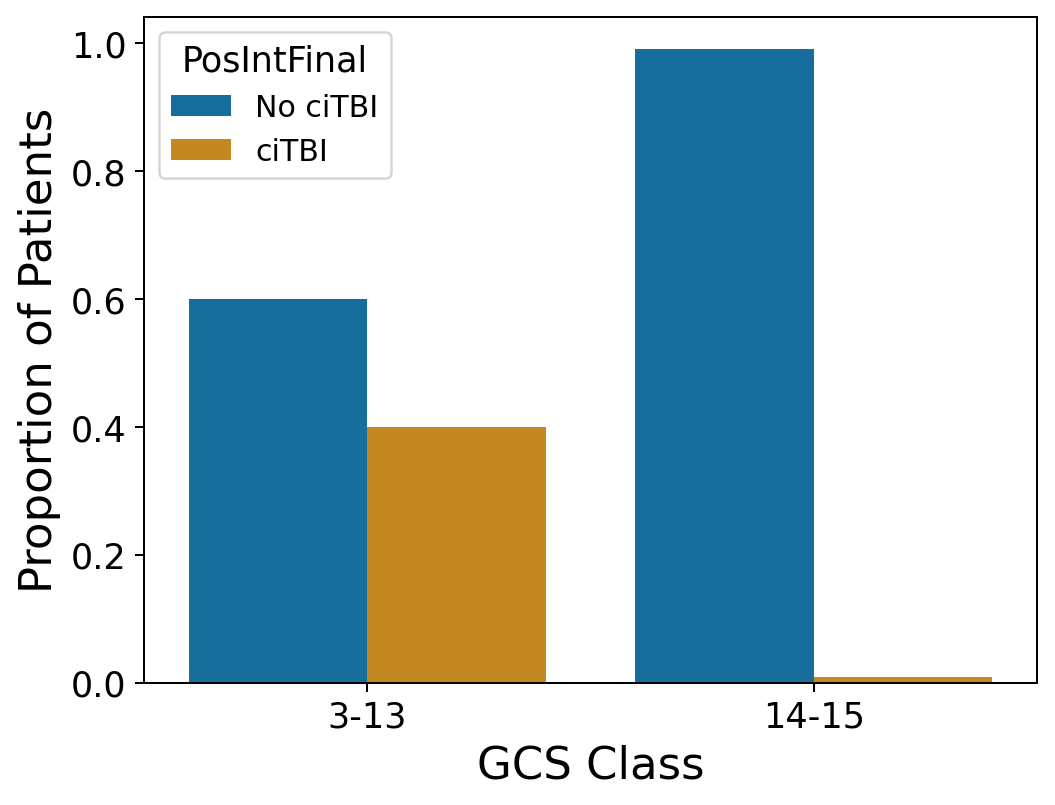

In [47]:
df2 = df.copy()
gcs_count_df = df2.groupby(["GCSGroup", "PosIntFinal"]).count().iloc[:, 0]
gcs_count_df = gcs_count_df / gcs_count_df.groupby(level=0).sum()
gcs_count_df = gcs_count_df.to_frame().reset_index()

gcs_count_df.loc[gcs_count_df["GCSGroup"] == 1, "GCSGroup"] = "3-13"
gcs_count_df.loc[gcs_count_df["GCSGroup"] == 2, "GCSGroup"] = "14-15"
gcs_count_df.loc[gcs_count_df["PosIntFinal"] == "No", "PosIntFinal"] = "No ciTBI"
gcs_count_df.loc[gcs_count_df["PosIntFinal"] == "Yes", "PosIntFinal"] = "ciTBI"

plt.figure()
sns.barplot(data=gcs_count_df, y="PatNum", hue="PosIntFinal", x="GCSGroup", palette="colorblind")
plt.xlabel("GCS Class")
plt.ylabel("Proportion of Patients")
plt.savefig("D:/Berkeley/Spring/stat-214/stat-214/lab1/figs/GCSTotal_prop.png", bbox_inches="tight")

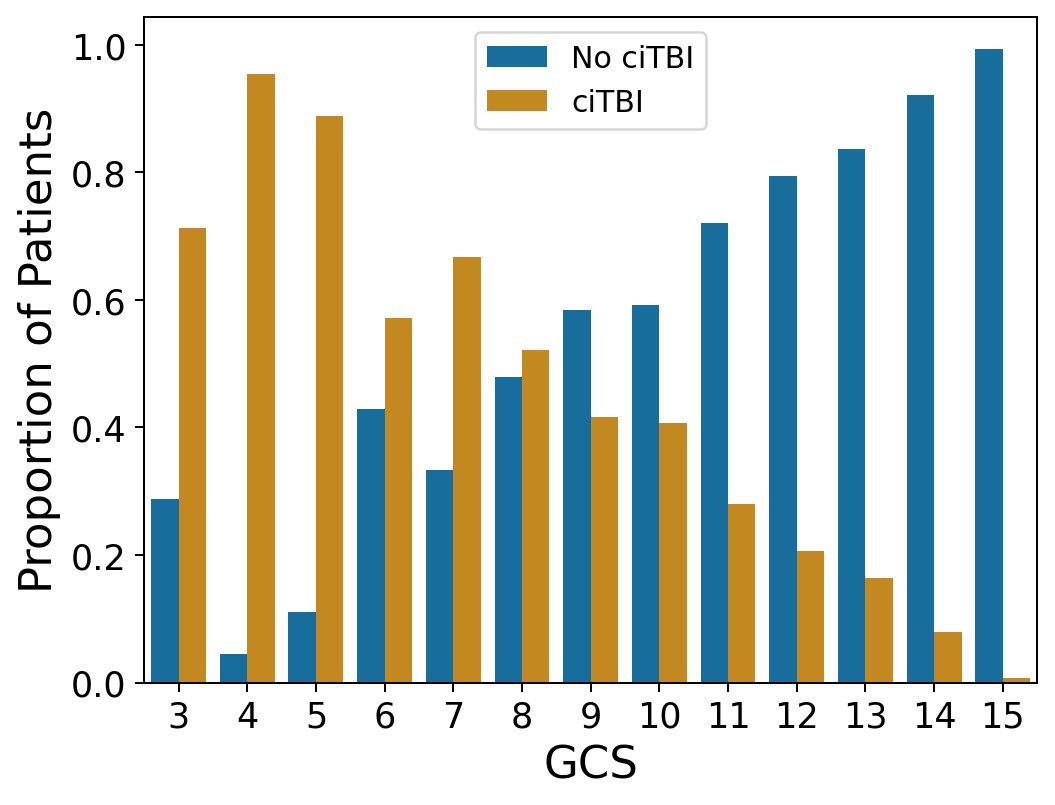

In [21]:

gcs_total_df = df2.groupby(["GCSTotal", "PosIntFinal"]).count().iloc[:, 0]
gcs_total_df = gcs_total_df / gcs_total_df.groupby(level=0).sum()
gcs_total_df = gcs_total_df.to_frame().reset_index()
gcs_total_df.loc[gcs_total_df["PosIntFinal"] == "No", "PosIntFinal"] = "No ciTBI"
gcs_total_df.loc[gcs_total_df["PosIntFinal"] == "Yes", "PosIntFinal"] = "ciTBI"

plt.figure()
sns.barplot(data=gcs_total_df, y="PatNum", hue="PosIntFinal", x="GCSTotal", palette="colorblind")
plt.xlabel("GCS")
plt.ylabel("Proportion of Patients")
plt.legend(title="")
plt.show()
# plt.savefig("./figs/GCS_prop.png", bbox_inches="tight")

In [48]:
df_orig = df.copy()
df = df.loc[df['GCSTotal'] >= 14, :]
print(len(df_orig))
print(len(df))

43399
42430


<Axes: ylabel='None'>

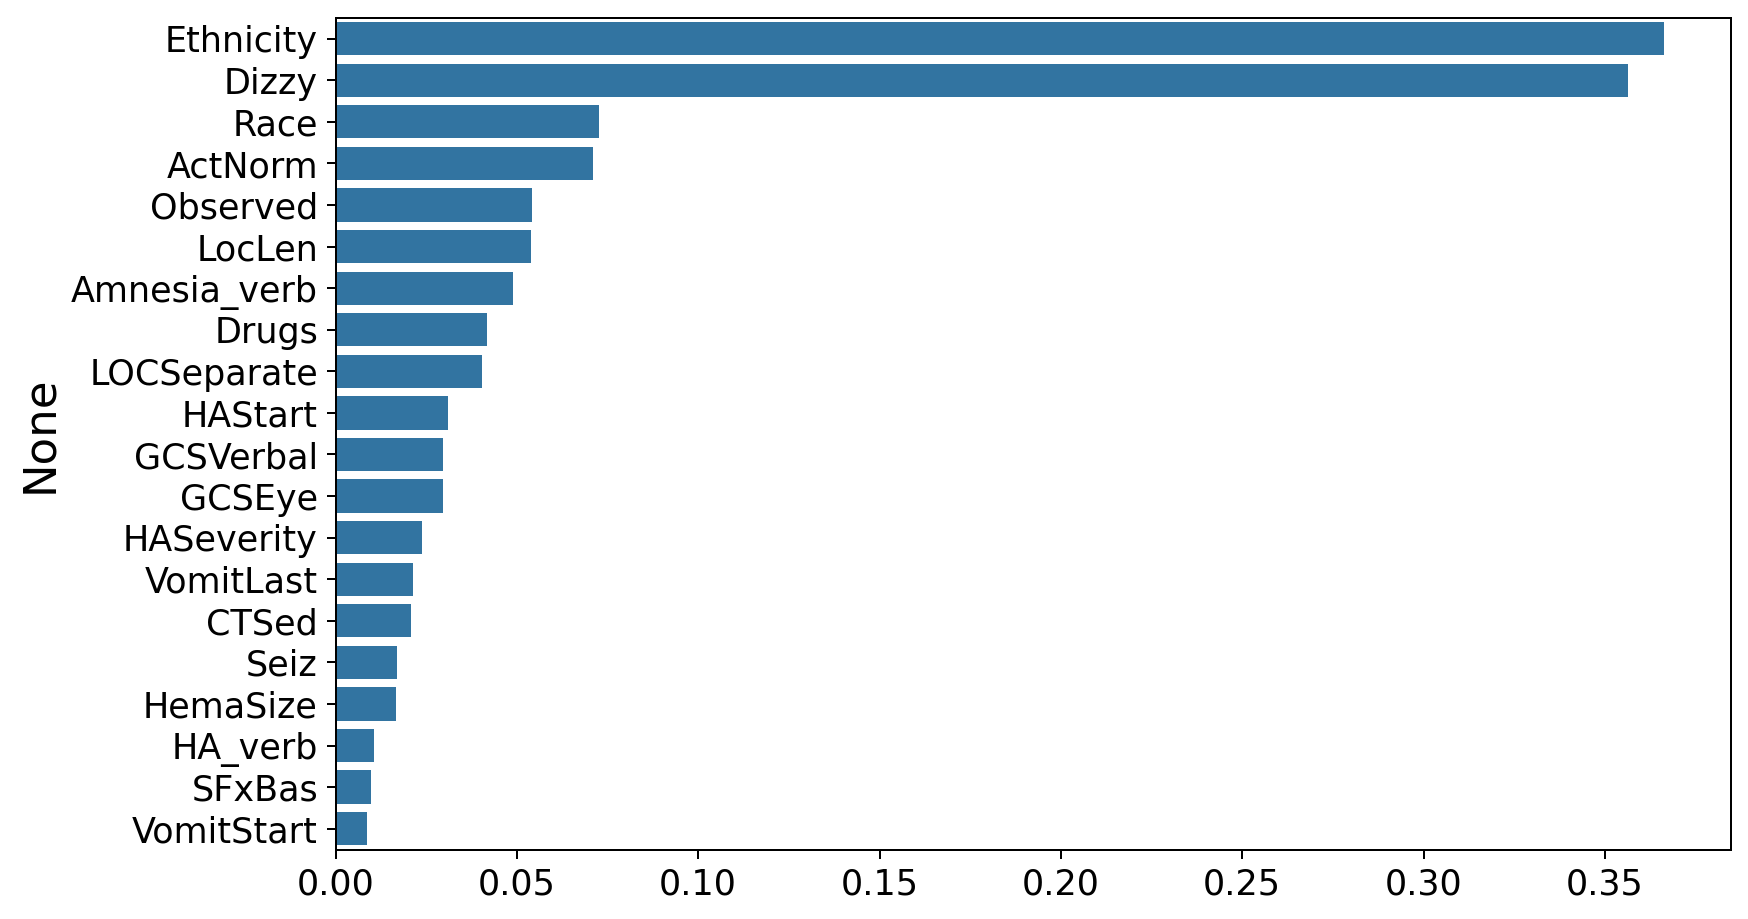

In [49]:
missing = df.apply(lambda col: (col == 'Unknown').mean()).sort_values(ascending=False)[:20]
plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, orient='h')
# plt.savefig("./figs/missing.png", bbox_inches="tight")

Text(0, 0.5, 'Proportion of Patients')

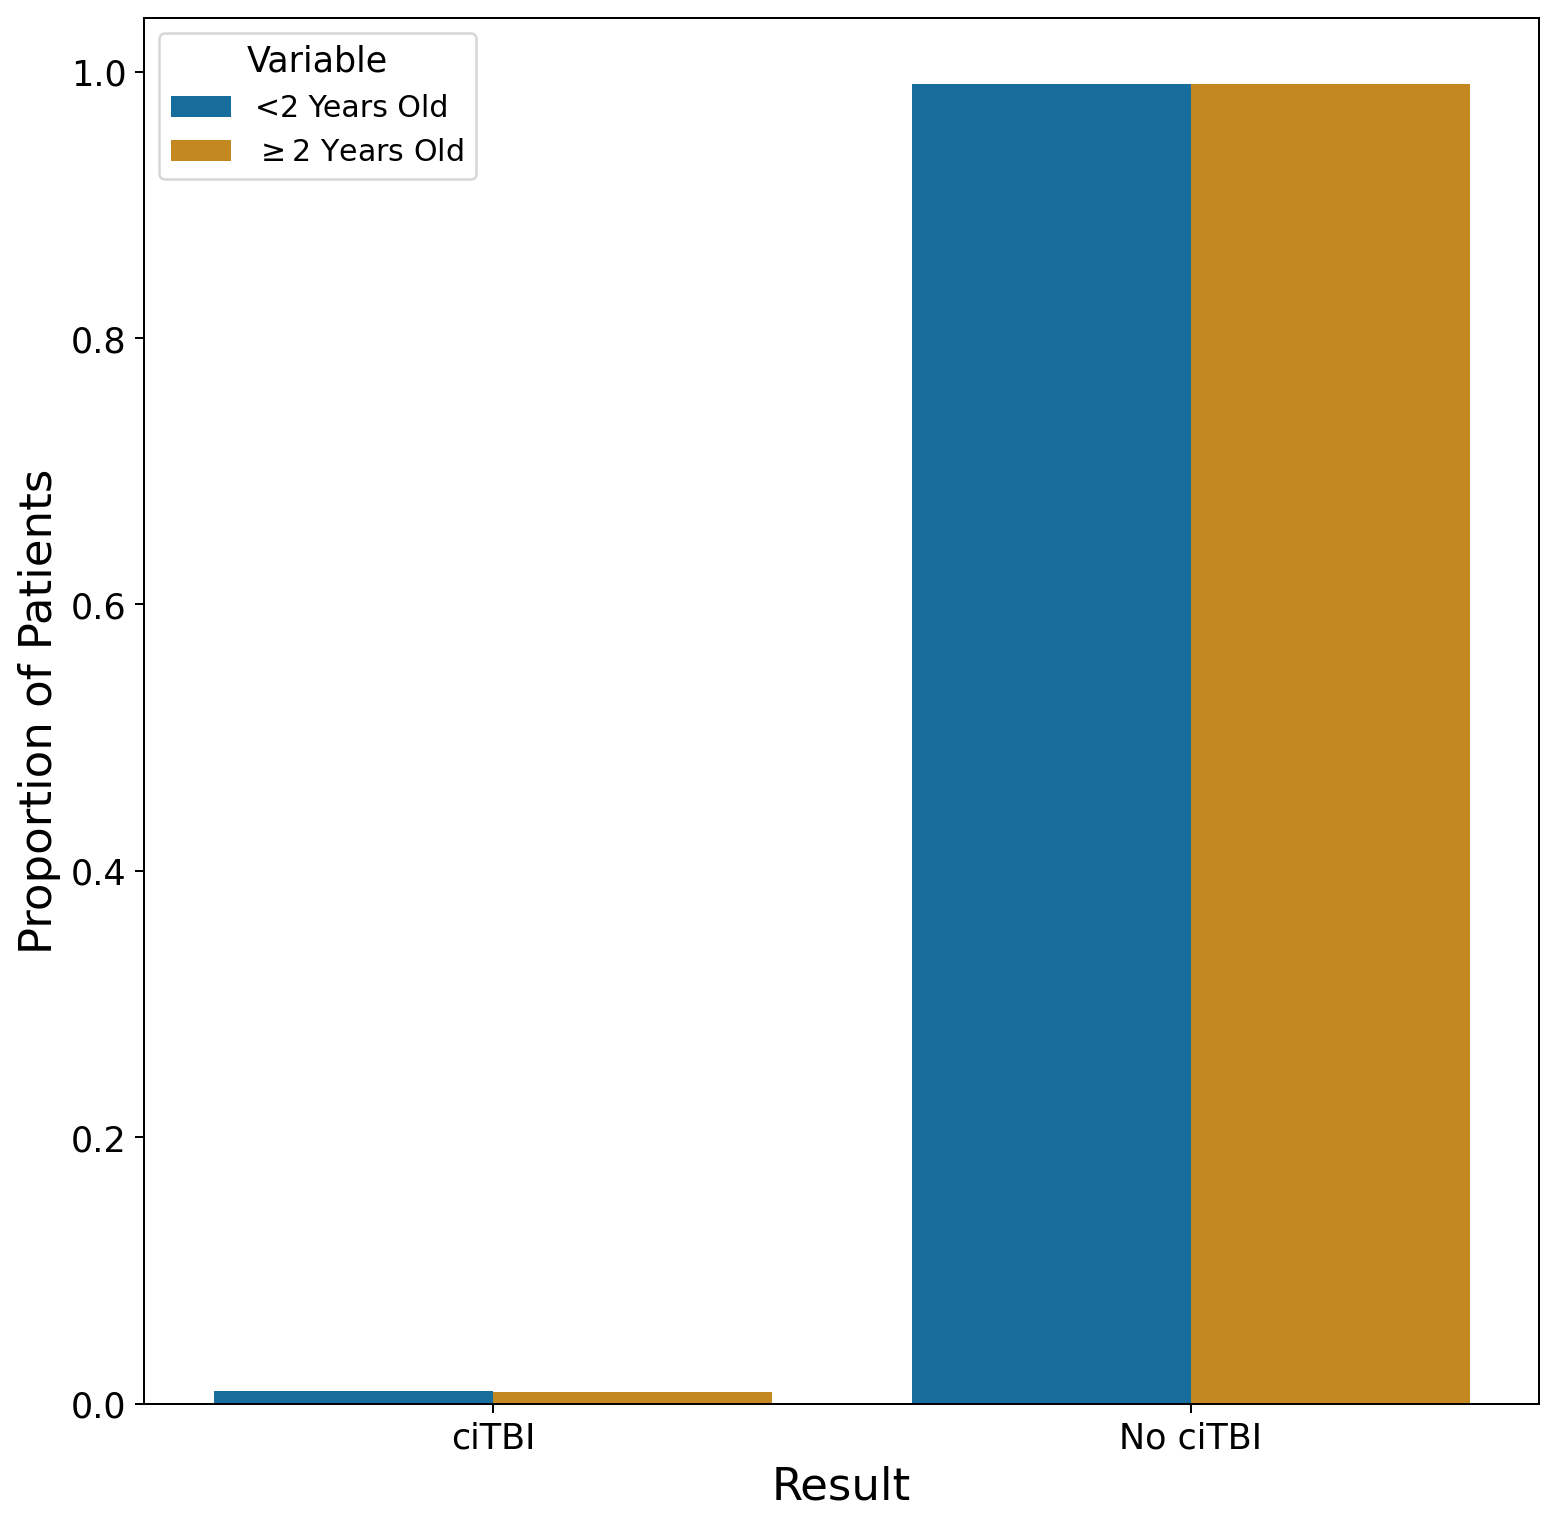

In [50]:
df2 = df.copy()
old_citbi = len(df2[(df2['AgeTwoPlus'] == 2) & (df2['PosIntFinal'] == 'Yes')]) 
old_no_citbi = len(df2[df2['AgeTwoPlus'] == 2]) - old_citbi
young_citbi = len(df2[(df2['AgeTwoPlus'] == 1) & (df2['PosIntFinal'] == 'Yes')]) 
young_no_citbi = len(df2[df2['AgeTwoPlus'] == 1]) - young_citbi
total_ct = [len(df2[df2['AgeTwoPlus'] == 2]), len(df2[df2['AgeTwoPlus'] == 1])]
age = pd.DataFrame(data={'Result': ['ciTBI', 'No ciTBI'], 
                         '<2 Years Old': [young_citbi / total_ct[1], young_no_citbi / total_ct[1]],
                         r'$\geq$' +  '2 Years Old': [old_citbi / total_ct[0], old_no_citbi / total_ct[0]]})

fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = age.melt(id_vars='Result').rename(columns=str.title)
sns.barplot(x='Result', y='Value', hue='Variable', data=tidy, ax=ax1, palette="colorblind")
plt.ylabel('Proportion of Patients')
# plt.savefig("./figs/prop_by_age.png", bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_11588\1296624075.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<2 Years Old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'


<Figure size 1152x864 with 0 Axes>

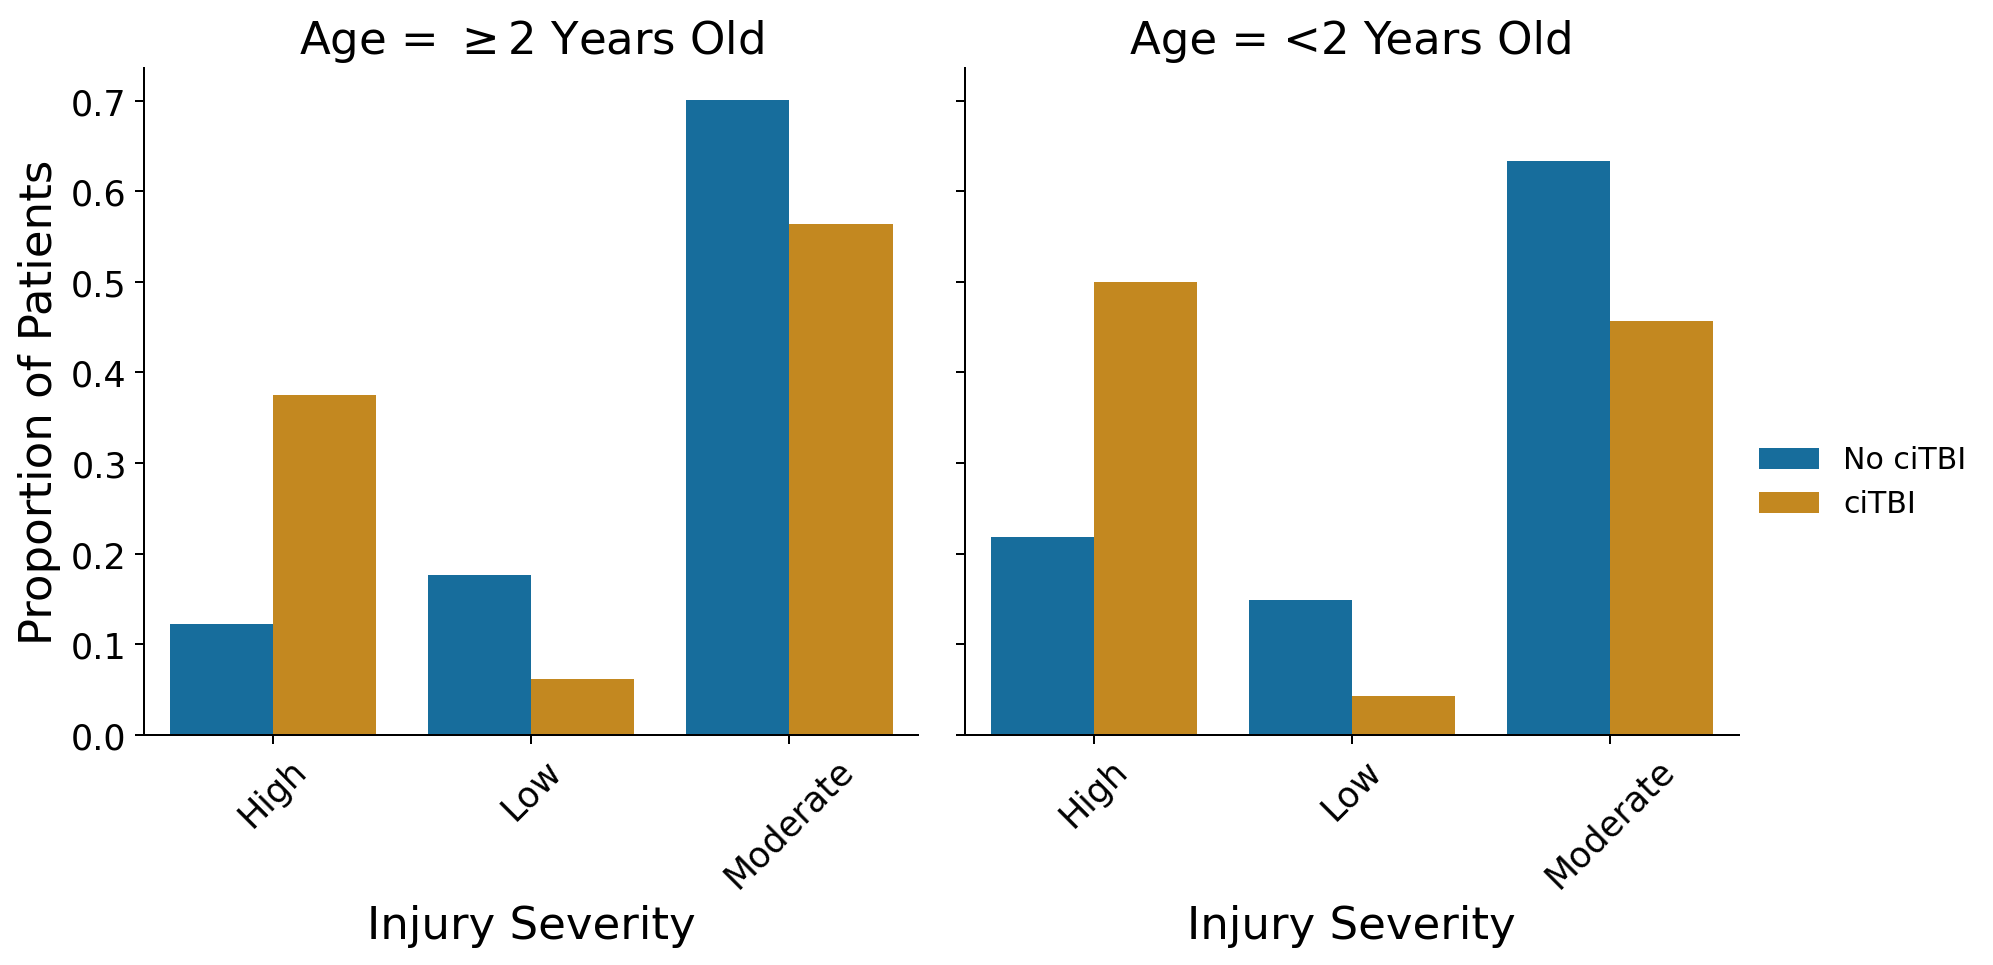

In [51]:
df_subset = df[["AgeTwoPlus", "PosIntFinal", "High_impact_InjSev"]]
df_subset = df_subset.loc[df_subset["High_impact_InjSev"] != "Unknown"]
df_subset.loc[df_subset["PosIntFinal"] == "No", "PosIntFinal"] = "No ciTBI"
df_subset.loc[df_subset["PosIntFinal"] == "Yes", "PosIntFinal"] = "ciTBI"
df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'
df_subset.loc[df_subset["AgeTwoPlus"] == 2, "AgeTwoPlus"] = r'$\geq$' +  '2 Years Old'

df_subset["val"] = 1
df_subset = df_subset.groupby(["AgeTwoPlus", 
                               "PosIntFinal", 
                               "High_impact_InjSev"]).count()
df_subset = df_subset / df_subset.groupby(level=[0, 1]).sum()
df_subset = df_subset.iloc[:, 0].to_frame().reset_index()

df_subset = df_subset.rename(columns={"AgeTwoPlus" : "Age"})

plt.figure()
g = sns.catplot(kind="bar", data=df_subset, x="High_impact_InjSev", y="val", 
            hue="PosIntFinal", col="Age", palette="colorblind")
g.set_axis_labels("Injury Severity", "Proportion of Patients" )
g.set_xticklabels(rotation=45)
g._legend.set_title("")
# plt.savefig("./figs/age_by_injuryseverity.png", bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_11588\1967990022.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Yes", 1)
C:\Users\admin\AppData\Local\Temp\ipykernel_11588\1967990022.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Unclear", np.nan)
C:\Users\admin\AppData\Local\Temp\ipykernel_11588\1967990022.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resu

<Figure size 1152x864 with 0 Axes>

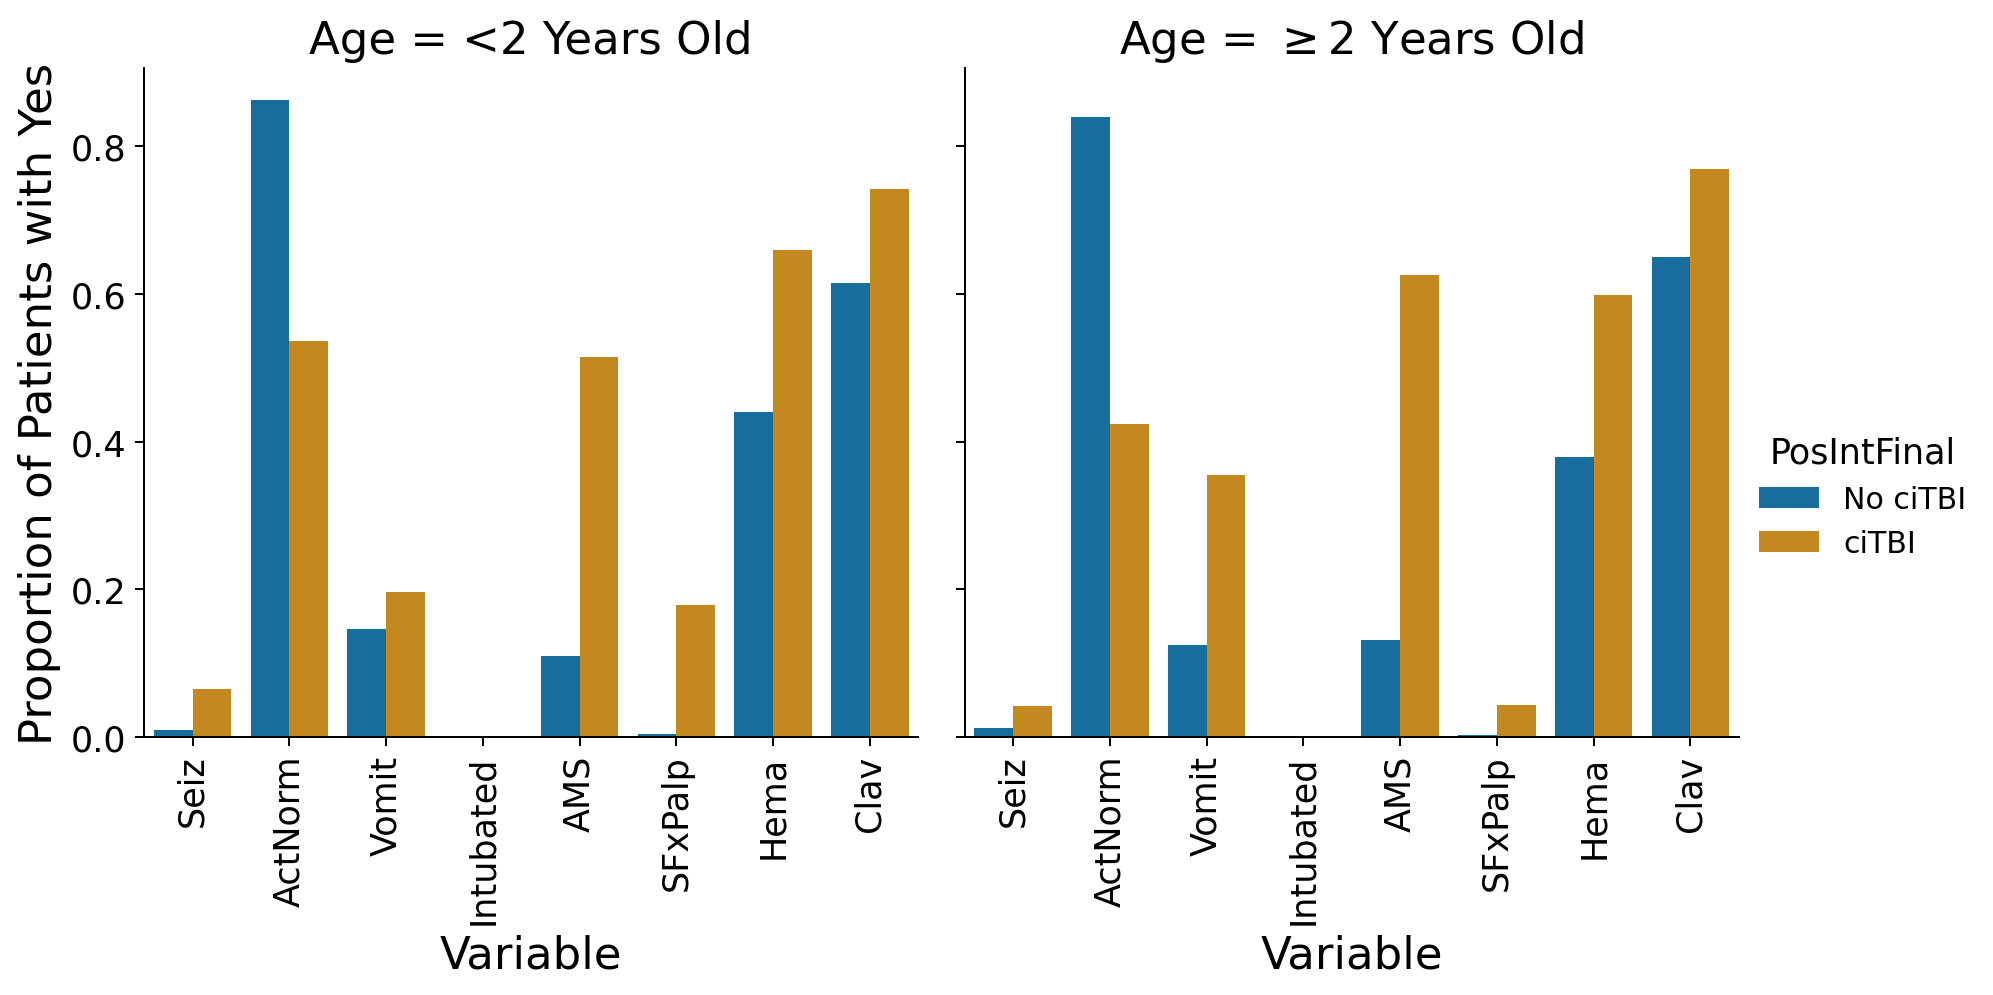

In [52]:
var_subset = ["Seiz", "ActNorm", "Vomit", 
 "Intubated",
 "AMS", "SFxPalp", "Hema", "Clav"]

df_subset = df[var_subset + ["AgeTwoPlus", "PosIntFinal"]]
df_subset = df_subset.loc[df_subset["SFxPalp"] != 2]
df_subset = df_subset.replace("No", 0)
df_subset = df_subset.replace("Yes", 1)
df_subset = df_subset.replace("Unclear", np.nan)
df_subset = df_subset.replace("Unknown", np.nan)

df_subset = df_subset.groupby(["AgeTwoPlus", "PosIntFinal"]).mean().reset_index()
df_subset.loc[df_subset["PosIntFinal"] == 0, "PosIntFinal"] = "No ciTBI"
df_subset.loc[df_subset["PosIntFinal"] == 1, "PosIntFinal"] = "ciTBI"
df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'
df_subset.loc[df_subset["AgeTwoPlus"] == 2, "AgeTwoPlus"] = r'$\geq$' +  '2 Years Old'

df_subset = df_subset.melt(id_vars=["AgeTwoPlus", "PosIntFinal"])
df_subset = df_subset.rename(columns={"AgeTwoPlus" : "Age"})
plt.figure()
g = sns.catplot(kind="bar", data=df_subset, x="variable", y="value", 
            hue="PosIntFinal", col="Age", palette="colorblind")
g.set_axis_labels("Variable", "Proportion of Patients with Yes" )
g.set_xticklabels(rotation=90)
# plt.savefig("./figs/covariate_by_age.png", bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_28680\573120166.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<2 Years Old' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'


<Figure size 1152x864 with 0 Axes>

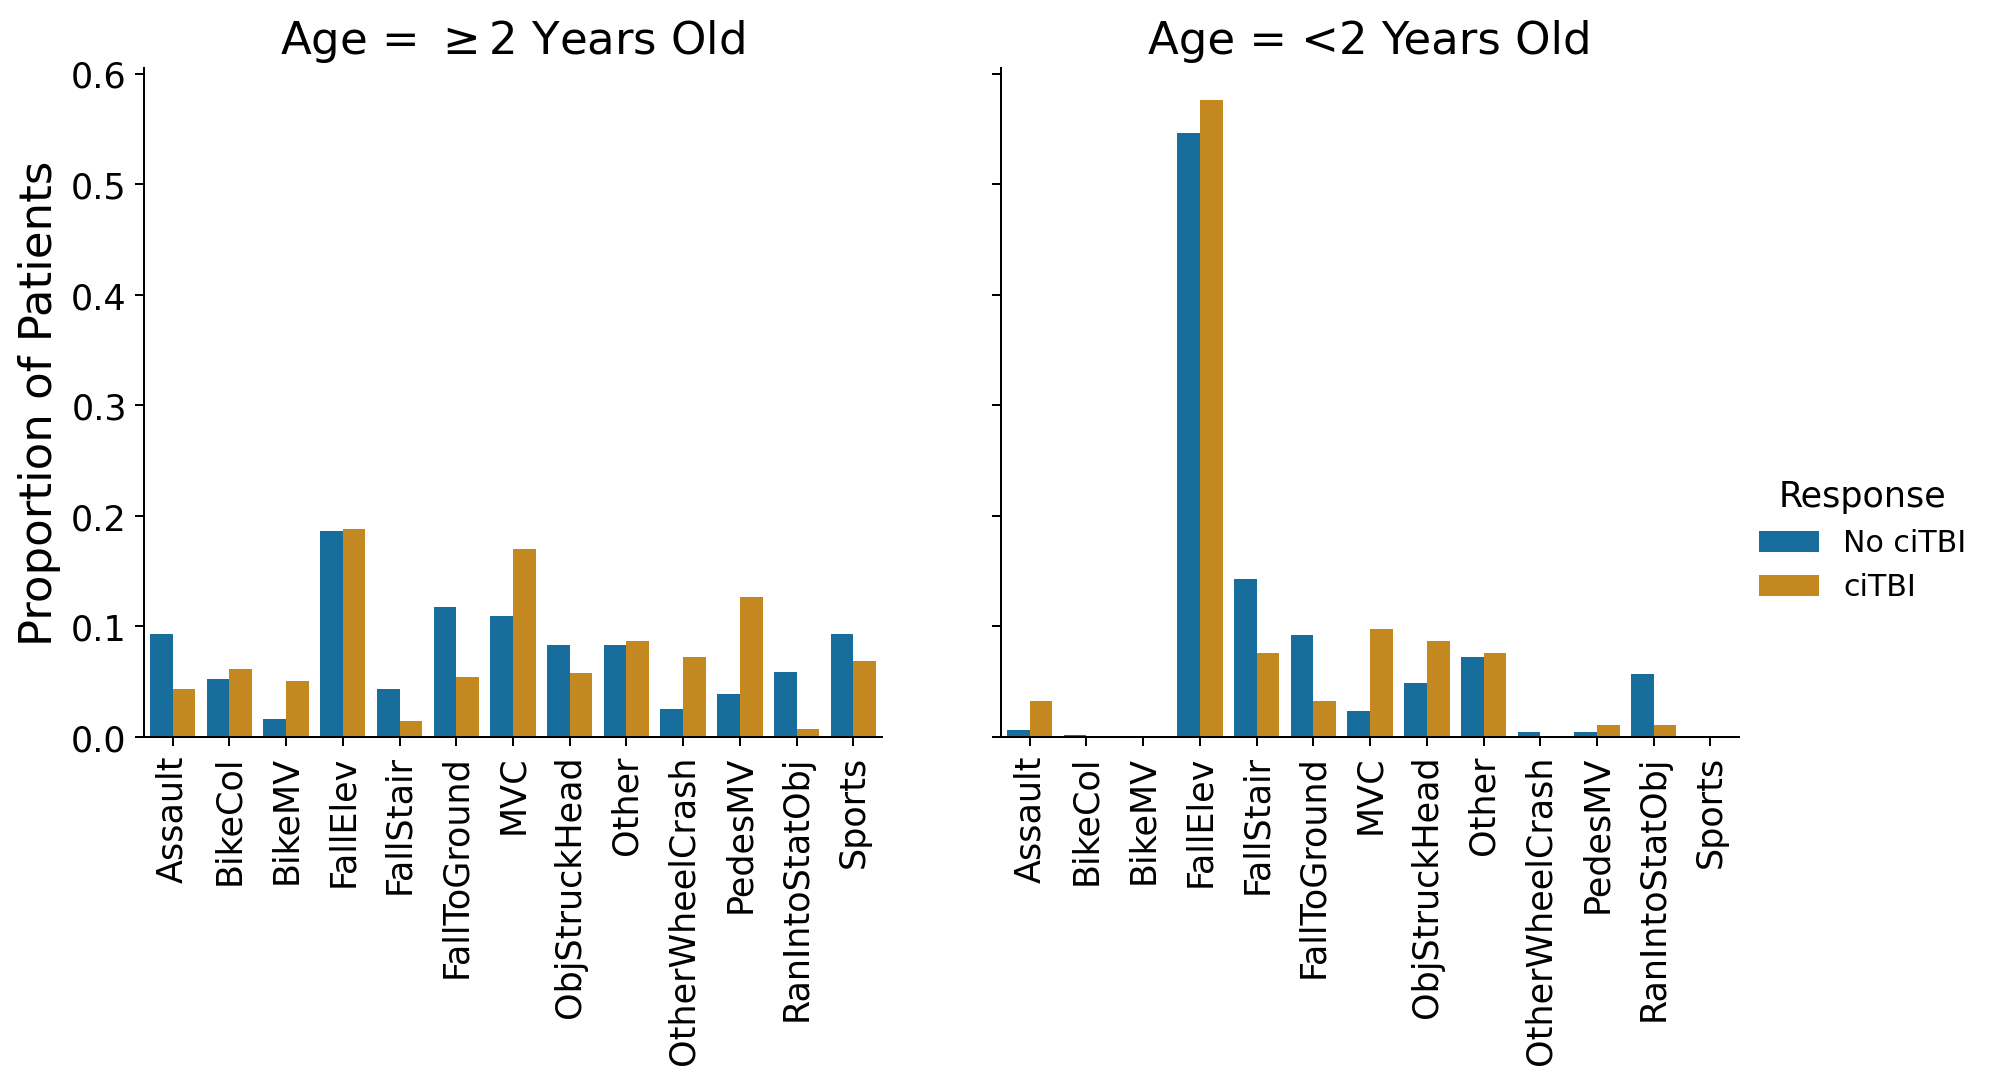

In [61]:
df_subset = df[["AgeTwoPlus", "PosIntFinal", "InjuryMech"]]
df_subset = df_subset.loc[df_subset["InjuryMech"] != "Unknown"]
df_subset.loc[df_subset["PosIntFinal"] == "No", "PosIntFinal"] = "No ciTBI"
df_subset.loc[df_subset["PosIntFinal"] == "Yes", "PosIntFinal"] = "ciTBI"
df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'
df_subset.loc[df_subset["AgeTwoPlus"] == 2, "AgeTwoPlus"] = r'$\geq$' +  '2 Years Old'

df_subset["val"] = 1
df_subset = df_subset.groupby(["AgeTwoPlus", 
                               "PosIntFinal", 
                               "InjuryMech"]).count()
df_subset = df_subset / df_subset.groupby(level=[0, 1]).sum()
df_subset = df_subset.iloc[:, 0].to_frame().reset_index()

df_subset = df_subset.rename(columns={"AgeTwoPlus" : "Age", "PosIntFinal" : "Response"})

plt.figure()
g = sns.catplot(kind="bar", data=df_subset, x="InjuryMech", y="val", 
            #row="Response", 
                hue="Response", col="Age", palette="colorblind")
g.set_axis_labels("", "Proportion of Patients" )
g.set_xticklabels(rotation=90)
# plt.savefig("./figs/age_by_injury_type.png", bbox_inches="tight")

In [96]:
df1_1 = df.copy()
df1_1 = df1_1[df1_1['PosIntFinal'].isna()==False]

tbi_on_ct = [f'Finding{i}' for i in range(1, 15)] + [f'Finding{i}' for i in range(20, 24)] + ['PosCT']
ctform_vars = ['CTForm1', 'IndAge', 'IndAmnesia', 'IndAMS', 'IndClinSFx',
                'IndHA', 'IndHema', 'IndLOC', 'IndMech', 'IndNeuroD',
                'IndRqstMD', 'IndRqstParent', 'IndRqstTrauma', 'IndSeiz', 'IndVomit',
                'IndXraySFx', 'IndOth', 'CTSed', 'CTSedAgitate', 'CTSedAge', 
                'CTSedRqst', 'CTSedOth']
outcome_vars = ['HospHeadPosCT', 'DeathTBI', 'HospHead', 'Intub24Head', 'Neurosurgery']
other_vars = ['CTDone', 'EDCT', 'EDDisposition', 'Observed']
all_cols_to_drop = tbi_on_ct + outcome_vars + other_vars + ctform_vars

df1_1 = df1_1.drop(columns=all_cols_to_drop)
df1_1 = df1_1.drop(columns=['PatNum', 'EmplType', 'Certification', 'Ethnicity', 'Race', 'Gender', 'Dizzy',
                      'AgeInMonth', 'AgeinYears', 'GCSTotal', 'GCSGroup'])
print(df.shape)
print(df1_1.shape)

(42430, 125)
(42428, 64)


In [ ]:
# posIntFinal = {
#         'No': 0,
#         'Yes': 1
#     }
# df1['PosIntFinal'] = df1['PosIntFinal'].map(posIntFinal)

In [97]:
df1_1.head()

,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,LocLen,Seiz,SeizOccur,SeizLen,ActNorm,HA_verb,...,OSIExtremity,OSICut,OSICspine,OSIFlank,OSIAbdomen,OSIPelvis,OSIOth,Drugs,AgeTwoPlus,PosIntFinal
0,Assault,Moderate,No,No,Not applicable,No,Not applicable,Not applicable,Yes,Yes,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,2,No
1,FallElev,Moderate,No,No,Not applicable,No,Not applicable,Not applicable,Yes,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,2,No
3,FallToGround,Low,Pre/Non-verbal,No,Not applicable,No,Not applicable,Not applicable,Yes,Pre/Non-verbal,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,1,No
5,Unknown,Unknown,Pre/Non-verbal,No,Not applicable,No,Not applicable,Not applicable,Yes,Pre/Non-verbal,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,2,No
6,RanIntoStatObj,Low,No,No,Not applicable,No,Not applicable,Not applicable,Yes,No,...,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,No,2,No


In [ ]:
df1_1.to_csv("cleaned_data.csv")

In [79]:
df1_2 = df1_1.copy()
df1_2 = df1_2.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "O" else x)


In [80]:
df1_2.isna().sum().sort_values()

InjuryMech            0
High_impact_InjSev    0
Amnesia_verb          0
LOCSeparate           0
LocLen                0
                     ..
OSIPelvis             0
OSIOth                0
Drugs                 0
AgeTwoPlus            0
PosIntFinal           0
Length: 64, dtype: int64

In [81]:
df_onehot = df1_2.copy()

In [82]:
# Initialize OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df1_2.columns[:-2]  
numeric_cols = df1_2.columns[-2:]  

# Extract categorical and numerical parts
df_categorical = df1_2[categorical_cols]
df_numeric = df1_2[numeric_cols]

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  
encoded_array = encoder.fit_transform(df_categorical)

# Convert encoded array to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(), index=df1_2.index)

# Concatenate encoded and numeric columns
df_final = pd.concat([encoded_df, df_numeric], axis=1)



In [84]:
df_final.head()

,InjuryMech_BikeCol,InjuryMech_BikeMV,InjuryMech_FallElev,InjuryMech_FallStair,InjuryMech_FallToGround,InjuryMech_MVC,InjuryMech_ObjStruckHead,InjuryMech_Other,InjuryMech_OtherWheelCrash,InjuryMech_PedesMV,...,OSIAbdomen_Not applicable,OSIAbdomen_Yes,OSIPelvis_Not applicable,OSIPelvis_Yes,OSIOth_Not applicable,OSIOth_Yes,Drugs_Unknown,Drugs_Yes,AgeTwoPlus,PosIntFinal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,No
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,No
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,No
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,No
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2,No


In [85]:
df_pca = df_final.copy()
df_pca = df_pca.replace("Unknown", 0)
df_pca = df_pca.replace("Unclear", 0)

df_pca_key = df_pca[["AgeTwoPlus", "PosIntFinal"]]
df_pca = df_pca.drop(columns=["AgeTwoPlus", "PosIntFinal"])

In [64]:
df_pca.columns

Index(['InjuryMech_BikeCol', 'InjuryMech_BikeMV', 'InjuryMech_FallElev',
       'InjuryMech_FallStair', 'InjuryMech_FallToGround', 'InjuryMech_MVC',
       'InjuryMech_ObjStruckHead', 'InjuryMech_Other',
       'InjuryMech_OtherWheelCrash', 'InjuryMech_PedesMV',
       ...
       'OSIFlank_Not applicable', 'OSIFlank_Yes', 'OSIAbdomen_Not applicable',
       'OSIAbdomen_Yes', 'OSIPelvis_Not applicable', 'OSIPelvis_Yes',
       'OSIOth_Not applicable', 'OSIOth_Yes', 'Drugs_Unknown', 'Drugs_Yes'],
      dtype='object', length=163)

[0.06449309 0.11920625 0.16675722 0.20967598 0.25162742]


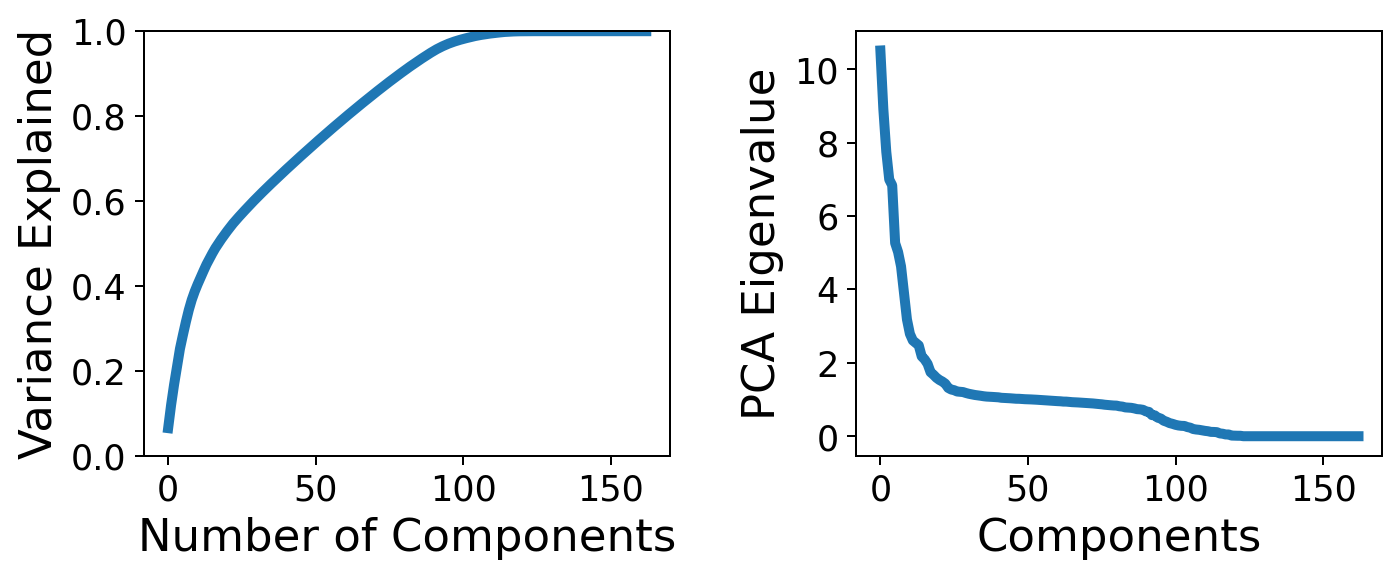

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_pca_scaled = StandardScaler().fit_transform(df_pca)

# Conducting PCA 
pca = PCA().fit(df_pca_scaled) 
explained_variance = np.copy(pca.explained_variance_ratio_)
explained_variance_sum = explained_variance

# Variance explained
for i in range(1, len(explained_variance_sum)) :
    explained_variance_sum[i] += explained_variance_sum[i-1] 

# Scree Plot
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
plt.plot(explained_variance_sum)
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained")
plt.ylim(0, 1)

plt.subplot(2, 2, 2)
plt.plot(pca.explained_variance_)
plt.xlabel("Components")
plt.ylabel("PCA Eigenvalue")

plt.tight_layout()
# plt.savefig("./figs/pca_cum_var.png", bbox_inches="tight")

# PC Scores
pc_score = pca.transform(df_pca_scaled)

print(explained_variance_sum[:5])

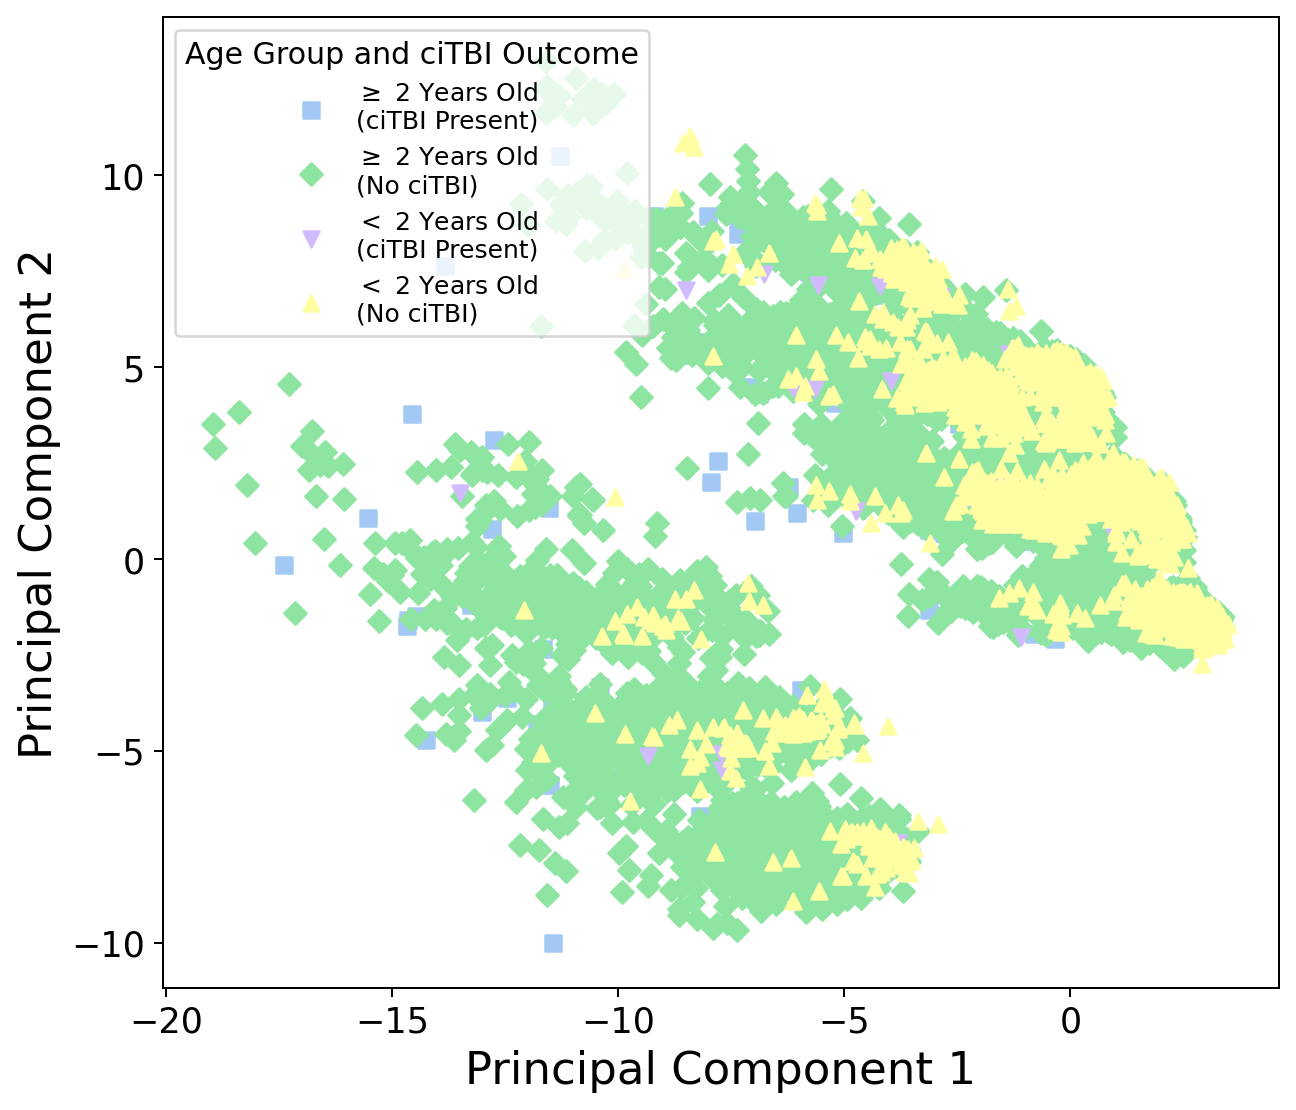

In [94]:
plt.figure(figsize=(8, 7))
color_idx = 0
color_list = sns.color_palette("pastel")

marker_list = ["s", "D", "v", "^"]  
color_list_local = [color_list[0], color_list[2], color_list[4], color_list[8]]
age_labels = {2: r"$\geq$ 2 Years Old", 1: r"$<$ 2 Years Old"}
outcome_labels = {'Yes': "ciTBI Present", 'No': "No ciTBI"}

for age_val in [2, 1]:  # Age groups
    for outcome_val in ['Yes', 'No']:  # ciTBI outcomes
        sample_idx = (df_pca_key["AgeTwoPlus"] == age_val) & (df_pca_key["PosIntFinal"] == outcome_val)
        
        # Set marker size
        sz = 40 if age_val == 1 else 40

        plt.scatter(
            pc_score[sample_idx, 0], pc_score[sample_idx, 1], 
            label=f"{age_labels[age_val]}\n({outcome_labels[outcome_val]})",
            s=sz, marker=marker_list[color_idx],
            color=color_list_local[color_idx]
        )
        color_idx += 1

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Age Group and ciTBI Outcome", fontsize=10, title_fontsize=12, loc="best", frameon=True)

# plt.savefig("./figs/pca_cluster.png", bbox_inches="tight")

0.10120675025926275


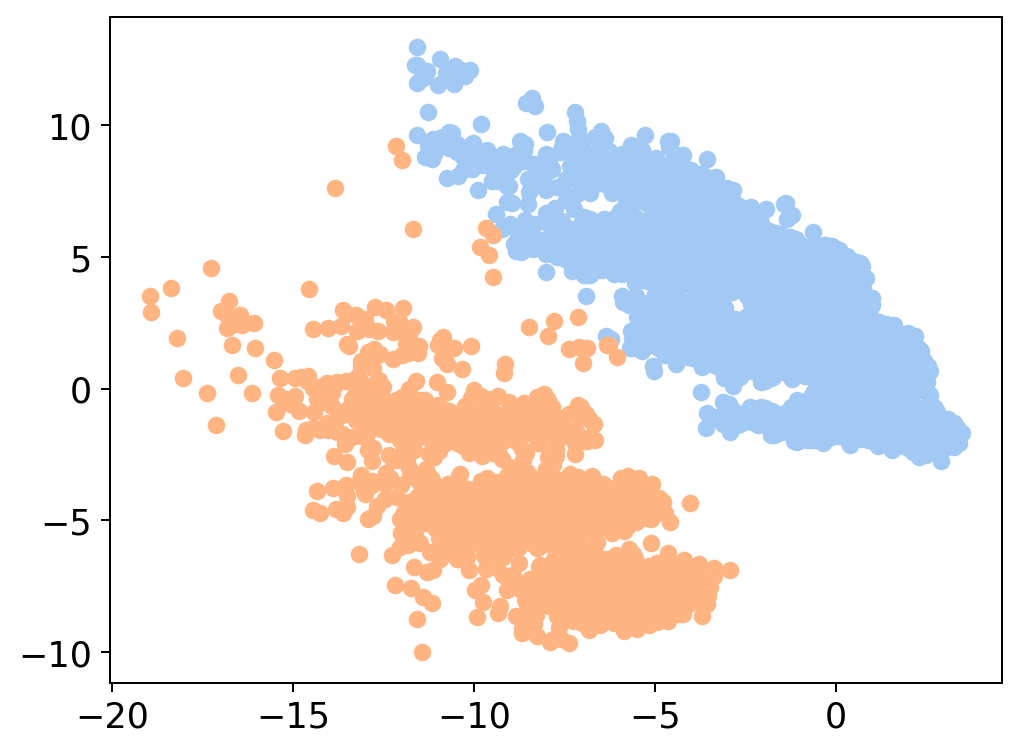

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(pc_score[:, 0:2])
km_labels = kmeans.predict(pc_score[:, 0:2])

print(km_labels.mean())
plt.figure()
plt.scatter(pc_score[km_labels == 0, 0], pc_score[km_labels == 0, 1], color=color_list[0])
plt.scatter(pc_score[km_labels == 1, 0], pc_score[km_labels == 1, 1], color=color_list[1])
plt.show()
# plt.savefig("./figs/k_means_cluster.png", bbox_inches="tight")

C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Unclear", np.nan)
C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Unknown", np.nan)
C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No ciTBI' has dt

<Figure size 1152x864 with 0 Axes>

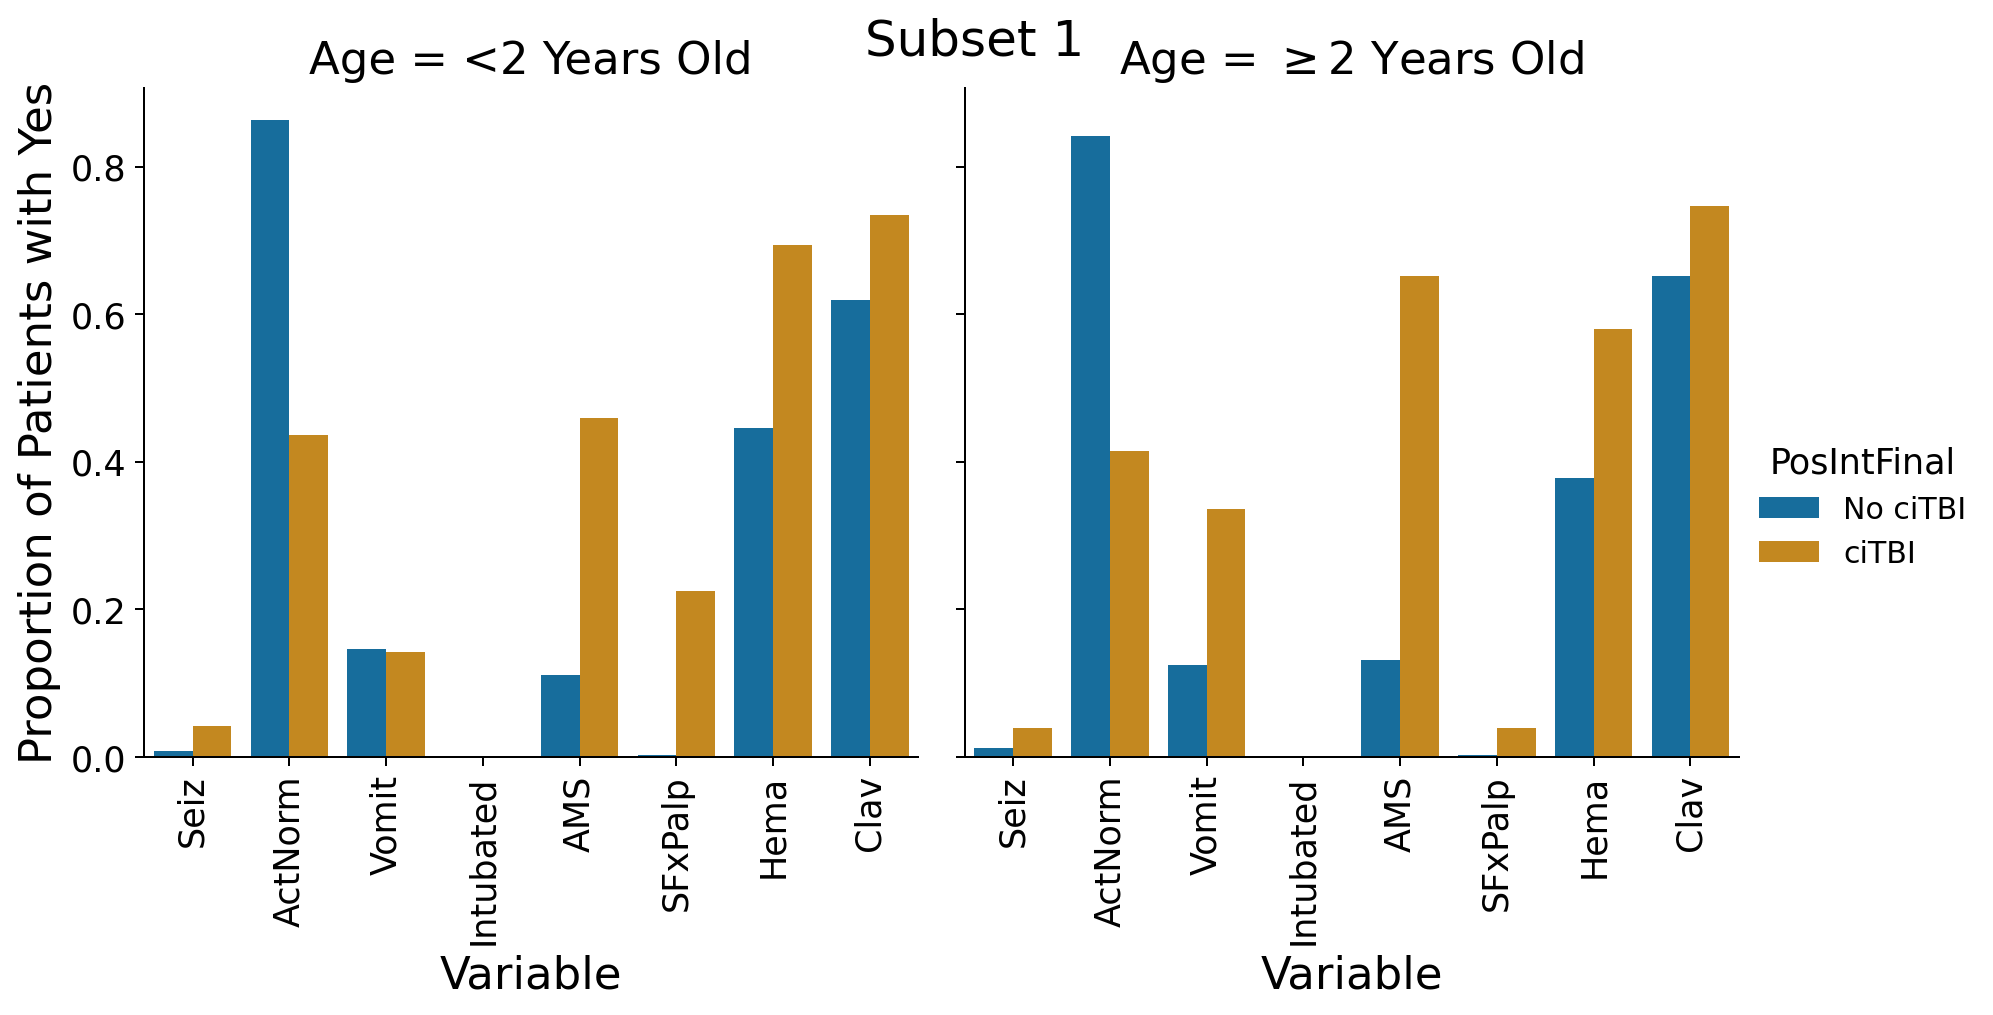

C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Unclear", np.nan)
C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset = df_subset.replace("Unknown", np.nan)
C:\Users\admin\AppData\Local\Temp\ipykernel_1500\3834768855.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No ciTBI' has dt

<Figure size 1152x864 with 0 Axes>

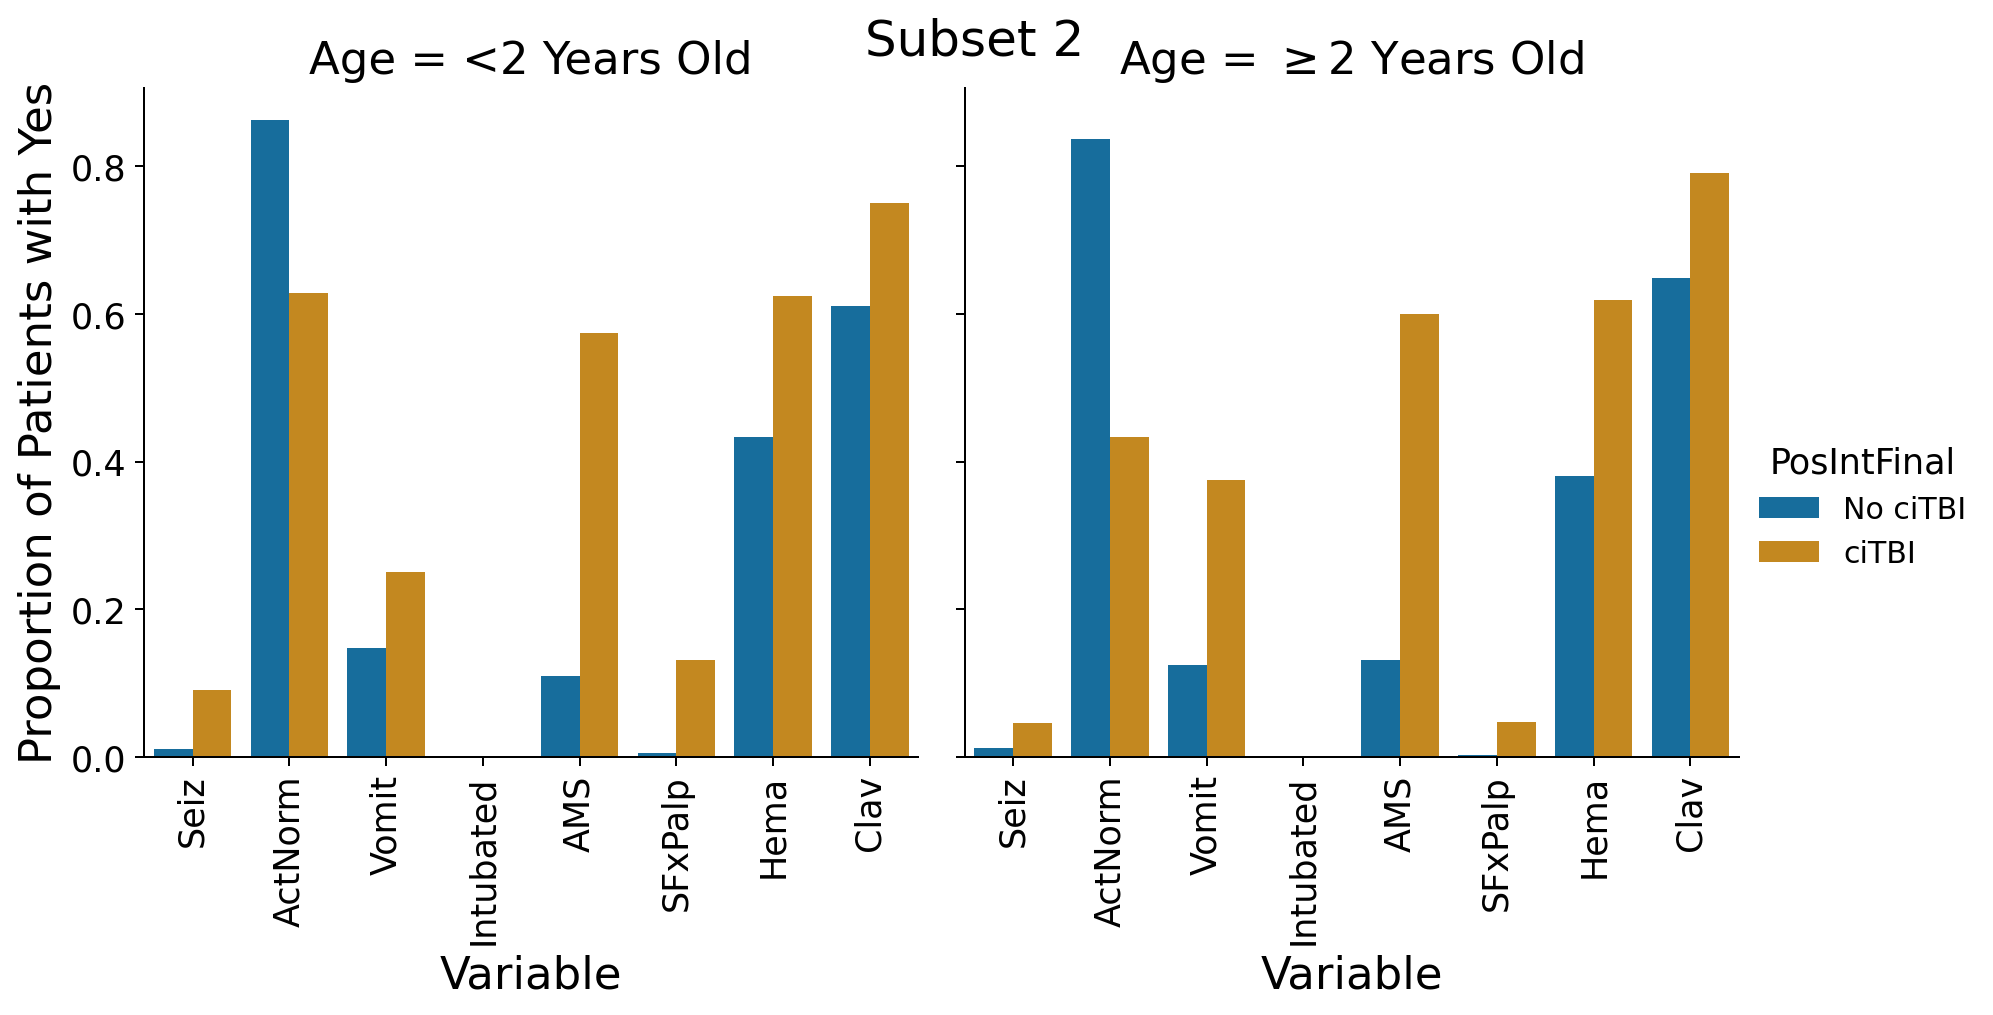

In [ ]:
df = pd.read_csv('cleaned_data.csv')

# Define subset variables
var_subset = ["Seiz", "ActNorm", "Vomit", "Intubated", "AMS", "SFxPalp", "Hema", "Clav"]

# Randomly split dataset into two equal halves
df_part1 = df.sample(frac=0.5, random_state=42)
df_part2 = df.drop(df_part1.index)  # Remaining data

# Function to preprocess data and create a plot
def plot_covariates(df_subset, title, filename):
    df_subset = df_subset[var_subset + ["AgeTwoPlus", "PosIntFinal"]]
    df_subset = df_subset.loc[df_subset["SFxPalp"] != 2]
    df_subset = df_subset.replace("No", 0)
    df_subset = df_subset.replace("Yes", 1)
    df_subset = df_subset.replace("Unclear", np.nan)
    df_subset = df_subset.replace("Unknown", np.nan)

    df_subset = df_subset.groupby(["AgeTwoPlus", "PosIntFinal"]).mean().reset_index()
    df_subset.loc[df_subset["PosIntFinal"] == 0, "PosIntFinal"] = "No ciTBI"
    df_subset.loc[df_subset["PosIntFinal"] == 1, "PosIntFinal"] = "ciTBI"
    df_subset.loc[df_subset["AgeTwoPlus"] == 1, "AgeTwoPlus"] = '<2 Years Old'
    df_subset.loc[df_subset["AgeTwoPlus"] == 2, "AgeTwoPlus"] = r'$\geq$' +  '2 Years Old'

    df_subset = df_subset.melt(id_vars=["AgeTwoPlus", "PosIntFinal"])
    df_subset = df_subset.rename(columns={"AgeTwoPlus" : "Age"})

    # Create plot
    plt.figure()
    g = sns.catplot(kind="bar", data=df_subset, x="variable", y="value", 
                    hue="PosIntFinal", col="Age", palette="colorblind")
    g.set_axis_labels("Variable", "Proportion of Patients with Yes")
    g.set_xticklabels(rotation=90)
    plt.suptitle(title)
    
    # Save figure
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

# Generate plots for both dataset parts
plot_covariates(df_part1, "Subset 1", "./figs/covariate_by_age_part1.png")
plot_covariates(df_part2, "Subset 2", "./figs/covariate_by_age_part2.png")
